In [1]:
import blocksci

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
import datetime

In [4]:
import utils

In [5]:
from analysis import assess_accuracy, df_accuracy_over_time

In [6]:
sns.set_theme()

In [7]:
plot_args = {"ylim":(0, 1.05), "xlim": (datetime.datetime(2011, 1, 1), None), "figsize": (8, 5)}

In [8]:
import collections
import random

In [9]:
chain = blocksci.Blockchain(utils.blocksci_config())

In [10]:
my_cm = blocksci.cluster.ClusterManager(utils.latest_clustering(), chain)

In [11]:
cluster_member = blocksci.heuristics.change.cluster_member(my_cm)

### Assess accuracy of change heuristics

In [12]:
utils.latest_groundtruth()

'/home/ubuntu/Data/groundtruth/20210715-4-final'

In [13]:
gt = blocksci.GroundTruth(utils.latest_groundtruth(), chain)

In [14]:
gt.transactions().size

35257428

In [15]:
%time true_change = gt.transactions().map(lambda tx: cluster_member(tx).index)

CPU times: user 36.4 s, sys: 30.8 s, total: 1min 7s
Wall time: 6min 31s


In [23]:
assert len(true_change) == gt.transactions().size

In [17]:
%time true_ts = gt.transactions().map(lambda tx: tx.block.time)

CPU times: user 4.43 s, sys: 444 ms, total: 4.88 s
Wall time: 4.86 s


In [18]:
%time txindexes = gt.transactions().index

CPU times: user 3.61 s, sys: 396 ms, total: 4.01 s
Wall time: 4 s


In [19]:
monthly_tx_count = pd.Series(txindexes, index=true_ts).resample("1 M").count()

In [20]:
def get_change_outputs(heuristic):
    return gt.transactions().map(lambda tx: heuristic.unique_index(tx))

In [21]:
def get_resampled(df_change):
    accuracy = df_change.resample("1 M").mean()
    coverage = df_change.resample("1 M").count().divide(monthly_tx_count, axis=0)
    combined =  accuracy.merge(coverage, how="left", left_index=True, right_index=True)
    combined.columns = ["Accuracy", "GT Coverage"]
    return combined

In [22]:
def save_plot(plot, name):
    plot.get_figure().savefig("figures/{}.pdf".format(name), format="pdf")

### Optimal Change

In [24]:
optimal_change_heuristic = blocksci.heuristics.change.optimal_change
optimal_change_filled = get_change_outputs(optimal_change_heuristic)

In [25]:
assess_accuracy(optimal_change_filled, true_change)

0.920804 & 0.305982 &
Heuristic identified a unique change output in 33.23% of transactions.
Heuristic was correct for 92.08% of identified change outputs.


{'correct': 10788126, 'incorrect': 927853, 'unindentified': 23541449}

In [26]:
df_optimal_change = df_accuracy_over_time(optimal_change_filled, true_change, true_ts)

In [27]:
df_optimal_resampled = get_resampled(df_optimal_change)

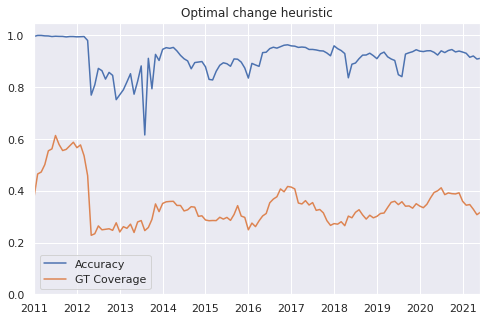

In [28]:
save_plot(df_optimal_resampled.plot(title="Optimal change heuristic", **plot_args), "optimal_change_accuracy")

### Optimal Change v2

In [29]:
optimal_change_with_fee_heuristic = blocksci.heuristics.change.optimal_change_with_fee
optimal_change_with_fee_filled = get_change_outputs(optimal_change_with_fee_heuristic)

In [30]:
assess_accuracy(optimal_change_with_fee_filled, true_change)

0.922025 & 0.2391 &
Heuristic identified a unique change output in 25.93% of transactions.
Heuristic was correct for 92.2% of identified change outputs.


{'correct': 8430056, 'incorrect': 712927, 'unindentified': 26114445}

In [31]:
df_optimal_change_with_fee = df_accuracy_over_time(optimal_change_with_fee_filled, true_change, true_ts)

In [32]:
df_optimal_change_with_fee_resampled = get_resampled(df_optimal_change_with_fee)

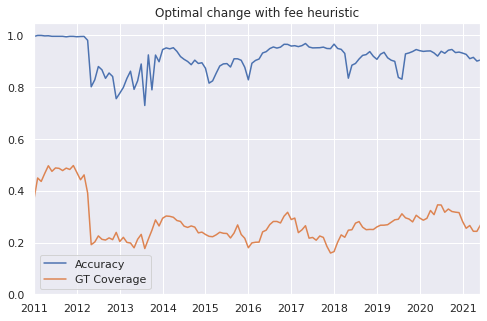

In [33]:
save_plot(df_optimal_change_with_fee_resampled.plot(title="Optimal change with fee heuristic", **plot_args), "optimal_change_with_fee_accuracy")

### Address type

In [34]:
addresstype_change_heuristic = blocksci.heuristics.change.address_type
addresstype_change_filled = get_change_outputs(addresstype_change_heuristic)

In [35]:
assess_accuracy(addresstype_change_filled, true_change)

0.885806 & 0.236927 &
Heuristic identified a unique change output in 26.75% of transactions.
Heuristic was correct for 88.58% of identified change outputs.


{'correct': 8353435, 'incorrect': 1076886, 'unindentified': 25827107}

In [36]:
df_addresstype_change = df_accuracy_over_time(addresstype_change_filled, true_change, true_ts)

In [37]:
df_addresstype_resampled = get_resampled(df_addresstype_change)

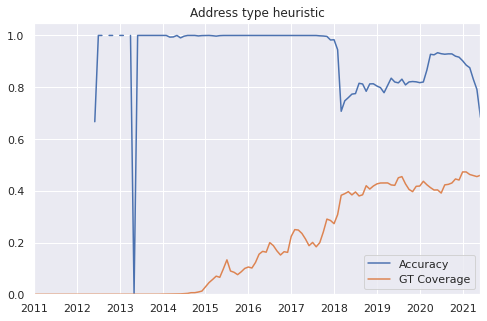

In [38]:
save_plot(df_addresstype_resampled.plot(title="Address type heuristic", **plot_args), "address_type_accuracy")

### Shadow

In [39]:
shadow_heuristic = blocksci.heuristics.change.client_change_address_behavior
shadow_filled = get_change_outputs(shadow_heuristic)

In [40]:
assess_accuracy(shadow_filled, true_change)

0.959775 & 0.54963 &
Heuristic identified a unique change output in 57.27% of transactions.
Heuristic was correct for 95.98% of identified change outputs.


{'correct': 19378533, 'incorrect': 812165, 'unindentified': 15066730}

In [41]:
df_shadow_change = df_accuracy_over_time(shadow_filled, true_change, true_ts)

In [42]:
df_shadow_resampled = get_resampled(df_shadow_change)

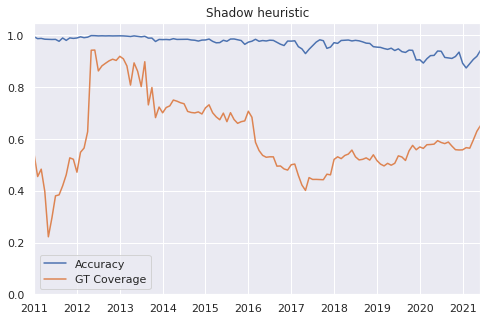

In [43]:
save_plot(df_shadow_resampled.plot(title="Shadow heuristic", **plot_args), "shadow_accuracy")

### Meiklejohn

In [44]:
meiklejohn_heuristic = blocksci.heuristics.change.meiklejohn
meiklejohn_filled = get_change_outputs(meiklejohn_heuristic)

In [45]:
assess_accuracy(meiklejohn_filled, true_change)

0.959775 & 0.54963 &
Heuristic identified a unique change output in 57.27% of transactions.
Heuristic was correct for 95.98% of identified change outputs.


{'correct': 19378533, 'incorrect': 812165, 'unindentified': 15066730}

In [46]:
df_meiklejohn_change = df_accuracy_over_time(meiklejohn_filled, true_change, true_ts)

In [47]:
df_meiklejohn_resampled = get_resampled(df_meiklejohn_change)

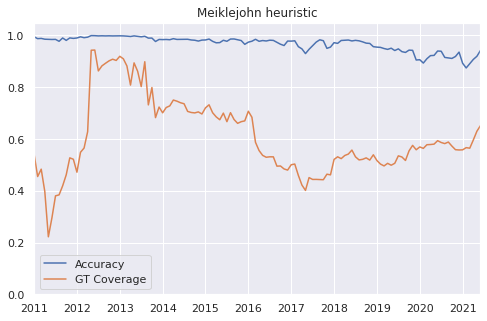

In [48]:
save_plot(df_meiklejohn_resampled.plot(title="Meiklejohn heuristic", **plot_args), "meiklejohn_accuracy")

### Meiklejohn Global

In [49]:
meiklejohn_global_heuristic = blocksci.heuristics.change.meiklejohn_global
meiklejohn_global_filled = get_change_outputs(meiklejohn_global_heuristic)

In [50]:
assess_accuracy(meiklejohn_global_filled, true_change)

0.948515 & 0.561543 &
Heuristic identified a unique change output in 59.2% of transactions.
Heuristic was correct for 94.85% of identified change outputs.


{'correct': 19798564, 'incorrect': 1074667, 'unindentified': 14384197}

In [51]:
df_meiklejohn_global_change = df_accuracy_over_time(meiklejohn_global_filled, true_change, true_ts)

In [52]:
df_meiklejohn_global_resampled = get_resampled(df_meiklejohn_global_change)

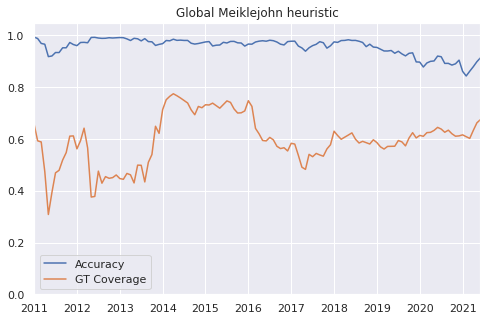

In [53]:
save_plot(df_meiklejohn_global_resampled.plot(title="Global Meiklejohn heuristic", **plot_args), "meiklejohn_global_accuracy")

#### Power of ten output value

In [55]:
def get_poweroften_change(digits):
    power_often_heuristic = blocksci.heuristics.change.power_of_ten_value(digits)
    return get_change_outputs(power_often_heuristic)

In [56]:
poweroften_filled_1 = get_poweroften_change(1)

In [57]:
poweroften_filled_2 = get_poweroften_change(2)

In [58]:
poweroften_filled_3 = get_poweroften_change(3)

In [59]:
poweroften_filled_4 = get_poweroften_change(4)

In [60]:
poweroften_filled_5 = get_poweroften_change(5)

In [61]:
poweroften_filled_6 = get_poweroften_change(6)

In [62]:
poweroften_filled_7 = get_poweroften_change(7)

In [63]:
poweroften_filled_8 = get_poweroften_change(8)

In [64]:
assess_accuracy(poweroften_filled_1, true_change)

0.913102 & 0.44933 &
Heuristic identified a unique change output in 49.21% of transactions.
Heuristic was correct for 91.31% of identified change outputs.


{'correct': 15842216, 'incorrect': 1507677, 'unindentified': 17907535}

In [65]:
assess_accuracy(poweroften_filled_2, true_change)

0.97547 & 0.467048 &
Heuristic identified a unique change output in 47.88% of transactions.
Heuristic was correct for 97.55% of identified change outputs.


{'correct': 16466910, 'incorrect': 414089, 'unindentified': 18376429}

In [66]:
assess_accuracy(poweroften_filled_3, true_change)

0.985533 & 0.419994 &
Heuristic identified a unique change output in 42.62% of transactions.
Heuristic was correct for 98.55% of identified change outputs.


{'correct': 14807893, 'incorrect': 217370, 'unindentified': 20232165}

In [67]:
assess_accuracy(poweroften_filled_4, true_change)

0.98666 & 0.374834 &
Heuristic identified a unique change output in 37.99% of transactions.
Heuristic was correct for 98.67% of identified change outputs.


{'correct': 13215691, 'incorrect': 178685, 'unindentified': 21863052}

In [68]:
assess_accuracy(poweroften_filled_5, true_change)

0.98191 & 0.302347 &
Heuristic identified a unique change output in 30.79% of transactions.
Heuristic was correct for 98.19% of identified change outputs.


{'correct': 10659980, 'incorrect': 196389, 'unindentified': 24401059}

In [69]:
assess_accuracy(poweroften_filled_6, true_change)

0.97704 & 0.211132 &
Heuristic identified a unique change output in 21.61% of transactions.
Heuristic was correct for 97.7% of identified change outputs.


{'correct': 7443970, 'incorrect': 174929, 'unindentified': 27638529}

In [70]:
assess_accuracy(poweroften_filled_7, true_change)

0.995334 & 0.106845 &
Heuristic identified a unique change output in 10.73% of transactions.
Heuristic was correct for 99.53% of identified change outputs.


{'correct': 3767065, 'incorrect': 17660, 'unindentified': 31472703}

In [71]:
assess_accuracy(poweroften_filled_8, true_change)

0.995882 & 0.055758 &
Heuristic identified a unique change output in 5.6% of transactions.
Heuristic was correct for 99.59% of identified change outputs.


{'correct': 1965897, 'incorrect': 8130, 'unindentified': 33283401}

In [72]:
df_poweroften = df_accuracy_over_time(poweroften_filled_4, true_change, true_ts)

In [73]:
df_poweroften = get_resampled(df_poweroften)

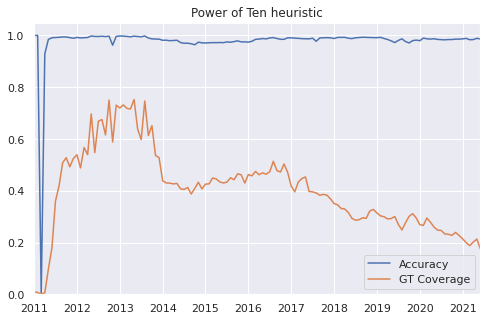

In [74]:
save_plot(df_poweroften.plot(title="Power of Ten heuristic", **plot_args), "power_of_ten_accuracy")

#### Compare different no of digits

In [75]:
df_poweroften_compare_accuracy = pd.DataFrame({
    "2": df_accuracy_over_time(poweroften_filled_2, true_change, true_ts)["Correct"].resample("1 M").mean(),
    "3": df_accuracy_over_time(poweroften_filled_3, true_change, true_ts)["Correct"].resample("1 M").mean(),
    "4": df_accuracy_over_time(poweroften_filled_4, true_change, true_ts)["Correct"].resample("1 M").mean(),
    "5": df_accuracy_over_time(poweroften_filled_5, true_change, true_ts)["Correct"].resample("1 M").mean(),
    "6": df_accuracy_over_time(poweroften_filled_6, true_change, true_ts)["Correct"].resample("1 M").mean(),
    "7": df_accuracy_over_time(poweroften_filled_7, true_change, true_ts)["Correct"].resample("1 M").mean()
})

<AxesSubplot:>

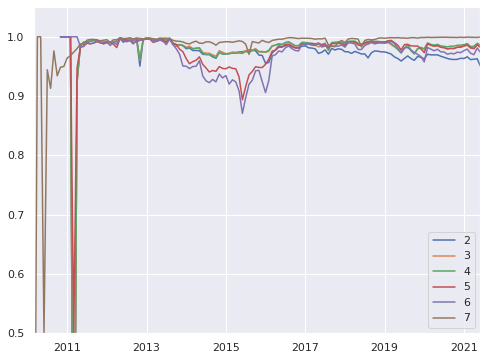

In [76]:
df_poweroften_compare_accuracy.plot(ylim=(0.5,1.05),figsize=(8,6))

In [77]:
df_poweroften_compare_coverage = pd.DataFrame({
    "2": df_accuracy_over_time(poweroften_filled_2, true_change, true_ts)["Correct"].resample("1 M").count().divide(monthly_tx_count, axis=0),
    "3": df_accuracy_over_time(poweroften_filled_3, true_change, true_ts)["Correct"].resample("1 M").count().divide(monthly_tx_count, axis=0),
    "4": df_accuracy_over_time(poweroften_filled_4, true_change, true_ts)["Correct"].resample("1 M").count().divide(monthly_tx_count, axis=0),
    "5": df_accuracy_over_time(poweroften_filled_5, true_change, true_ts)["Correct"].resample("1 M").count().divide(monthly_tx_count, axis=0),
    "6": df_accuracy_over_time(poweroften_filled_6, true_change, true_ts)["Correct"].resample("1 M").count().divide(monthly_tx_count, axis=0),
    "7": df_accuracy_over_time(poweroften_filled_7, true_change, true_ts)["Correct"].resample("1 M").count().divide(monthly_tx_count, axis=0)
})

<AxesSubplot:>

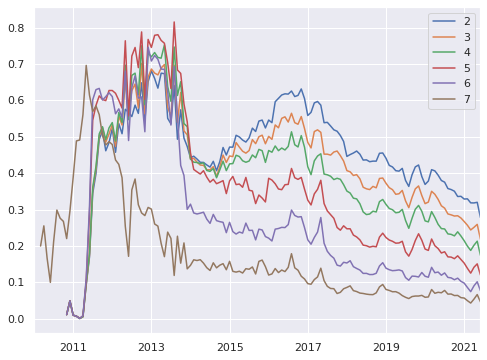

In [78]:
df_poweroften_compare_coverage.plot(figsize=(8,6))

#### Create single prediction for power of ten

In [79]:
df_pow10 = pd.DataFrame({
    "2": poweroften_filled_2,
    "3": poweroften_filled_3,
    "4": poweroften_filled_4,
    "5": poweroften_filled_5,
    "6": poweroften_filled_6,
    "7": poweroften_filled_7,
})
combined_pow10 = []
for row in df_pow10.itertuples():
    r = [x for x in row[1:] if x != -1]
    if r:
        assert r.count(r[0]) == len(r)
        combined_pow10.append(r[0])
    else:
        combined_pow10.append(-1)

In [80]:
assess_accuracy(combined_pow10, true_change)

0.97083 & 0.523002 &
Heuristic identified a unique change output in 53.87% of transactions.
Heuristic was correct for 97.08% of identified change outputs.


{'correct': 18439708, 'incorrect': 554050, 'unindentified': 16263670}

In [81]:
df_combined_pow10_change = df_accuracy_over_time(combined_pow10, true_change, true_ts)

In [82]:
df_combined_pow10_resampled = get_resampled(df_combined_pow10_change)

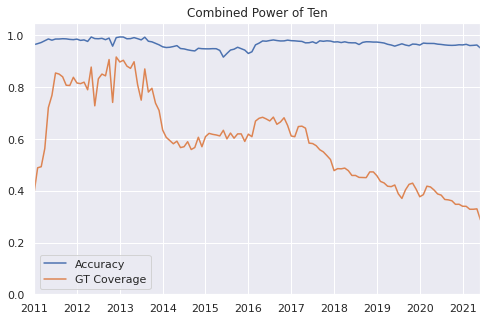

In [83]:
save_plot(df_combined_pow10_resampled.plot(title="Combined Power of Ten", **plot_args), "combined_pow10_accuracy")

In [84]:
df_pow10_all = pd.DataFrame({
    "1": poweroften_filled_1,
    "2": poweroften_filled_2,
    "3": poweroften_filled_3,
    "4": poweroften_filled_4,
    "5": poweroften_filled_5,
    "6": poweroften_filled_6,
    "7": poweroften_filled_7,
})
combined_pow10_all = []
for row in df_pow10_all.itertuples():
    r = [x for x in row[1:] if x != -1]
    if r:
        assert r.count(r[0]) == len(r)
        combined_pow10_all.append(r[0])
    else:
        combined_pow10_all.append(-1)

In [85]:
assess_accuracy(combined_pow10_all, true_change)

0.922501 & 0.581915 &
Heuristic identified a unique change output in 63.08% of transactions.
Heuristic was correct for 92.25% of identified change outputs.


{'correct': 20516815, 'incorrect': 1723609, 'unindentified': 13017004}

In [86]:
df_combined_pow10_change_all = df_accuracy_over_time(combined_pow10_all, true_change, true_ts)

In [87]:
df_combined_pow10_resampled_all = get_resampled(df_combined_pow10_change_all)

<AxesSubplot:title={'center':'Combined Power of Ten (including n=1)'}>

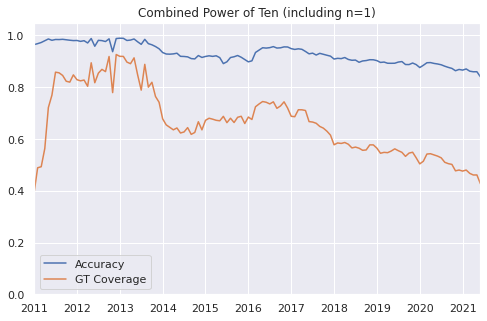

In [88]:
df_combined_pow10_resampled_all.plot(title="Combined Power of Ten (including n=1)", **plot_args)

In [89]:
poweroften_1_diff = []
for x, y in zip(poweroften_filled_1, poweroften_filled_2):
    if x == -1:
        poweroften_1_diff.append(-1)
    elif x == y:
        poweroften_1_diff.append(-1)
    else:
        poweroften_1_diff.append(x)
del x, y

In [90]:
assess_accuracy(poweroften_1_diff, true_change)

0.639766 & 0.058913 &
Heuristic identified a unique change output in 9.21% of transactions.
Heuristic was correct for 63.98% of identified change outputs.


{'correct': 2077107, 'incorrect': 1169559, 'unindentified': 32010762}

In [91]:
poweroften_8_diff = []
for x, y in zip(poweroften_filled_8, poweroften_filled_7):
    if x == -1:
        poweroften_8_diff.append(-1)
    elif x == y:
        poweroften_8_diff.append(-1)
    else:
        poweroften_8_diff.append(x)
del x, y

In [92]:
assess_accuracy(poweroften_8_diff, true_change)

0.950891 & 0.000154 &
Heuristic identified a unique change output in 0.02% of transactions.
Heuristic was correct for 95.09% of identified change outputs.


{'correct': 5441, 'incorrect': 281, 'unindentified': 35251706}

### Fingerprint

In [62]:
fp = blocksci.Fingerprinter(utils.latest_fingerprints(), chain)

### Output count

In [94]:
outputcount_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.OUTPUT_COUNT))
outputcount_filled = get_change_outputs(outputcount_heuristic)

In [95]:
assess_accuracy(outputcount_filled, true_change)

0.686466 & 0.283425 &
Heuristic identified a unique change output in 41.29% of transactions.
Heuristic was correct for 68.65% of identified change outputs.


{'correct': 9992834, 'incorrect': 4564088, 'unindentified': 20700506}

In [96]:
df_outputcount_change = df_accuracy_over_time(outputcount_filled, true_change, true_ts)

In [97]:
df_outputcount_resampled = get_resampled(df_outputcount_change)

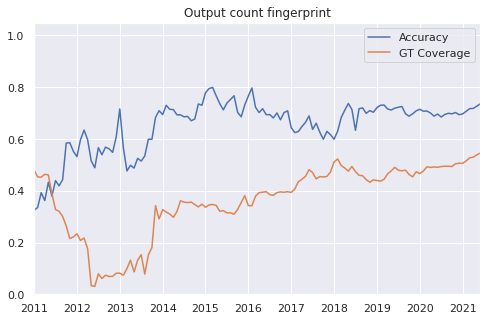

In [98]:
save_plot(df_outputcount_resampled.plot(title="Output count fingerprint", **plot_args), "fp_output_count_accuracy")

### Input and Output count

In [99]:
inoutcount_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask([utils.Fingerprint.OUTPUT_COUNT, utils.Fingerprint.INPUT_COUNT]))
inoutcount_filled = get_change_outputs(inoutcount_heuristic)

In [100]:
assess_accuracy(inoutcount_filled, true_change)

0.710803 & 0.263076 &
Heuristic identified a unique change output in 37.01% of transactions.
Heuristic was correct for 71.08% of identified change outputs.


{'correct': 9275388, 'incorrect': 3773775, 'unindentified': 22208265}

In [101]:
df_inoutcount_change = df_accuracy_over_time(inoutcount_filled, true_change, true_ts)

In [102]:
df_inoutcount_resampled = get_resampled(df_inoutcount_change)

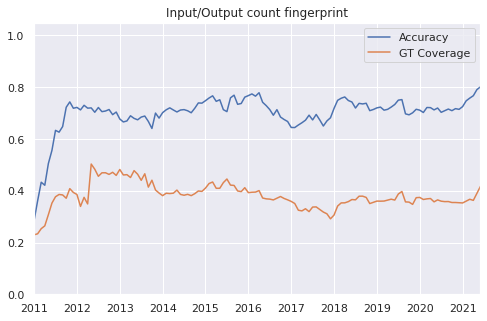

In [103]:
save_plot(df_inoutcount_resampled.plot(title="Input/Output count fingerprint", **plot_args), "fp_inout_count_accuracy")

### Version number

In [104]:
version_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.VERSION_2))
version_filled = get_change_outputs(version_heuristic)

In [105]:
assess_accuracy(version_filled, true_change)

0.98331 & 0.245861 &
Heuristic identified a unique change output in 25.0% of transactions.
Heuristic was correct for 98.33% of identified change outputs.


{'correct': 8668413, 'incorrect': 147135, 'unindentified': 26441880}

In [106]:
df_version_change = df_accuracy_over_time(version_filled, true_change, true_ts)

In [107]:
df_version_resampled = get_resampled(df_version_change)

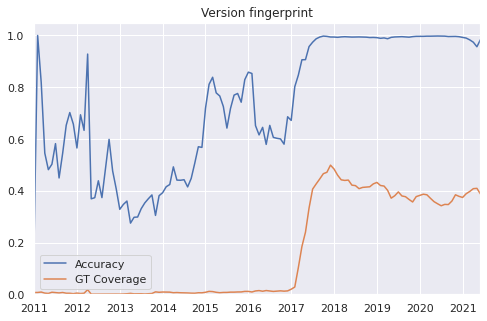

In [108]:
save_plot(df_version_resampled.plot(title="Version fingerprint", **plot_args), "fp_version_accuracy")

### Locktime

In [109]:
locktime_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask([utils.Fingerprint.LOCKTIME_HEIGHT, utils.Fingerprint.LOCKTIME_TIME]))
locktime_filled = get_change_outputs(locktime_heuristic)

In [110]:
assess_accuracy(locktime_filled, true_change)

0.987797 & 0.308169 &
Heuristic identified a unique change output in 31.2% of transactions.
Heuristic was correct for 98.78% of identified change outputs.


{'correct': 10865262, 'incorrect': 134227, 'unindentified': 24257939}

In [111]:
df_locktime_change = df_accuracy_over_time(locktime_filled, true_change, true_ts)

In [112]:
df_locktime_resampled = get_resampled(df_locktime_change)

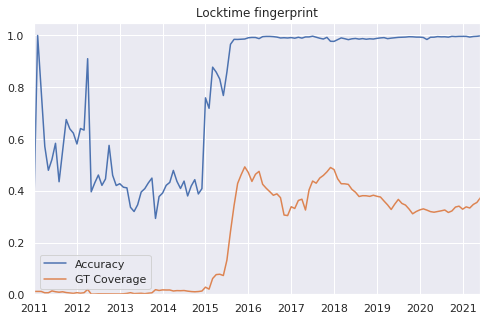

In [113]:
save_plot(df_locktime_resampled.plot(title="Locktime fingerprint", **plot_args), "fp_locktime_accuracy")

### RBF

In [114]:
rbf_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.RBF))
rbf_filled = get_change_outputs(rbf_heuristic)

In [115]:
assess_accuracy(rbf_filled, true_change)

0.963443 & 0.075516 &
Heuristic identified a unique change output in 7.84% of transactions.
Heuristic was correct for 96.34% of identified change outputs.


{'correct': 2662483, 'incorrect': 101026, 'unindentified': 32493919}

In [116]:
df_rbf_change = df_accuracy_over_time(rbf_filled, true_change, true_ts)

In [117]:
df_rbf_resampled = get_resampled(df_rbf_change)

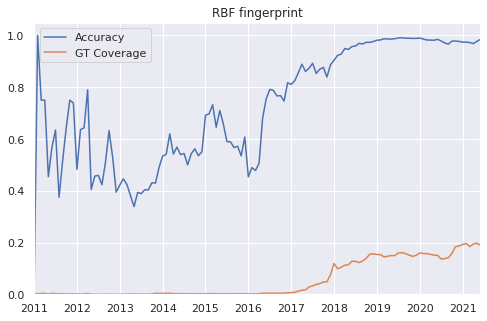

In [118]:
save_plot(df_rbf_resampled.plot(title="RBF fingerprint", **plot_args), "fp_rbf_accuracy")

### Segwit

In [119]:
segwit_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.SEGWIT))
segwit_filled = get_change_outputs(segwit_heuristic)

In [120]:
assess_accuracy(segwit_filled, true_change)

0.89238 & 0.190805 &
Heuristic identified a unique change output in 21.38% of transactions.
Heuristic was correct for 89.24% of identified change outputs.


{'correct': 6727288, 'incorrect': 811305, 'unindentified': 27718835}

In [121]:
df_segwit_change = df_accuracy_over_time(segwit_filled, true_change, true_ts)

In [122]:
df_segwit_resampled = get_resampled(df_segwit_change)

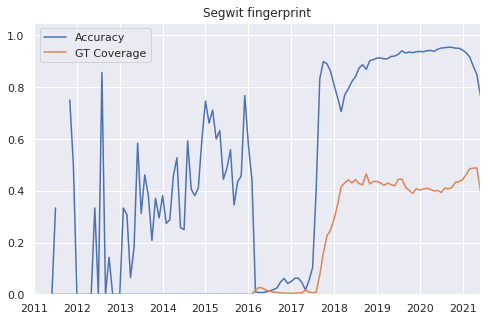

In [123]:
save_plot(df_segwit_resampled.plot(title="Segwit fingerprint", **plot_args), "fp_segwit_accuracy")

### Segwit-compatible

In [124]:
possible_segwit_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.SEGWIT_COMPATIBLE))
possible_segwit_filled = get_change_outputs(possible_segwit_heuristic)

In [125]:
assess_accuracy(possible_segwit_filled, true_change)

0.444653 & 0.025526 &
Heuristic identified a unique change output in 5.74% of transactions.
Heuristic was correct for 44.47% of identified change outputs.


{'correct': 899966, 'incorrect': 1124010, 'unindentified': 33233452}

In [126]:
df_possible_segwit_change = df_accuracy_over_time(possible_segwit_filled, true_change, true_ts)

In [127]:
df_possible_segwit_resampled = get_resampled(df_possible_segwit_change)

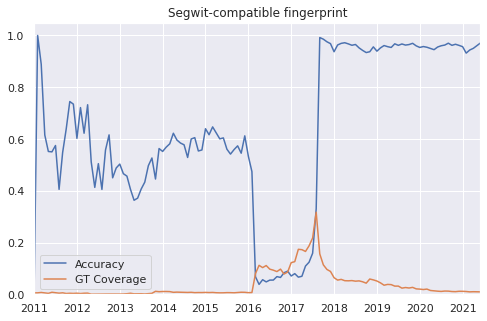

In [128]:
save_plot(df_possible_segwit_resampled.plot(title="Segwit-compatible fingerprint", **plot_args), "fp_possible_segwit_accuracy")

### Ordered inputs & outputs

In [129]:
ordered_inouts_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.SORTED_INOUTS))
ordered_inouts_filled = get_change_outputs(ordered_inouts_heuristic)

In [130]:
assess_accuracy(ordered_inouts_filled, true_change)

0.805772 & 0.303957 &
Heuristic identified a unique change output in 37.72% of transactions.
Heuristic was correct for 80.58% of identified change outputs.


{'correct': 10716729, 'incorrect': 2583222, 'unindentified': 21957477}

In [131]:
df_ordered_inouts_change = df_accuracy_over_time(ordered_inouts_filled, true_change, true_ts)

In [132]:
df_ordered_inouts_resampled = get_resampled(df_ordered_inouts_change)

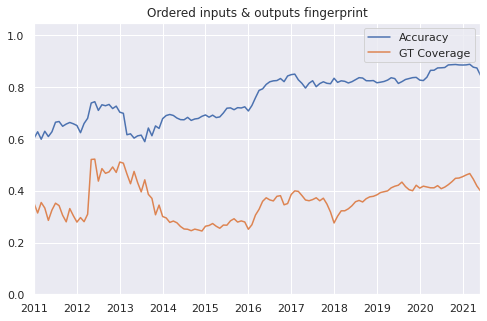

In [133]:
save_plot(df_ordered_inouts_resampled.plot(title="Ordered inputs & outputs fingerprint", **plot_args), "fp_ordered_inouts_accuracy")

### Zeroconf

In [134]:
zeroconf_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.ZEROCONF))
zeroconf_filled = get_change_outputs(zeroconf_heuristic)

In [135]:
assess_accuracy(zeroconf_filled, true_change)

0.620483 & 0.100237 &
Heuristic identified a unique change output in 16.15% of transactions.
Heuristic was correct for 62.05% of identified change outputs.


{'correct': 3534116, 'incorrect': 2161636, 'unindentified': 29561676}

In [136]:
df_zeroconf_change = df_accuracy_over_time(zeroconf_filled, true_change, true_ts)

In [137]:
df_zeroconf_resampled = get_resampled(df_zeroconf_change)

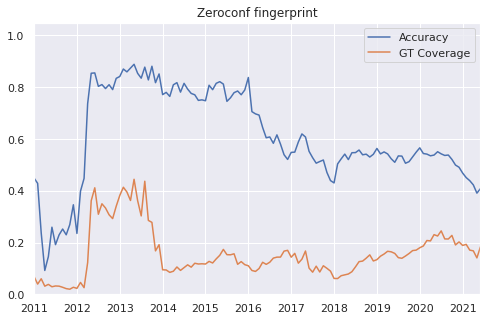

In [138]:
save_plot(df_zeroconf_resampled.plot(title="Zeroconf fingerprint", **plot_args), "fp_zeroconf_accuracy")

### Multisig Fingerprint

In [139]:
multisig_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.MULTISIG))
multisig_filled = get_change_outputs(multisig_heuristic)

In [140]:
assess_accuracy(multisig_filled, true_change)

0.996074 & 0.139837 &
Heuristic identified a unique change output in 14.04% of transactions.
Heuristic was correct for 99.61% of identified change outputs.


{'correct': 4930283, 'incorrect': 19431, 'unindentified': 30307714}

In [141]:
df_multisig_change = df_accuracy_over_time(multisig_filled, true_change, true_ts)

In [142]:
df_multisig_resampled = get_resampled(df_multisig_change)

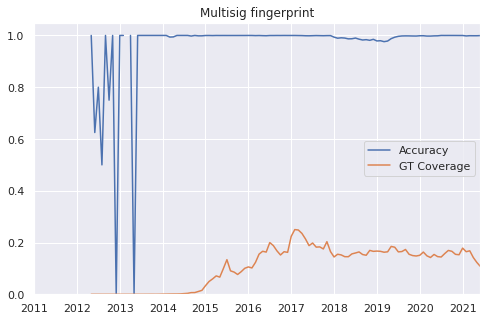

In [143]:
save_plot(df_multisig_resampled.plot(title="Multisig fingerprint", **plot_args), "fp_multisig_accuracy")

### Address Type Fingerprint

In [144]:
ADDRESS_FP = [utils.Fingerprint.P2PKH, utils.Fingerprint.P2SH, utils.Fingerprint.P2WPKH, utils.Fingerprint.P2WSH, utils.Fingerprint.ADDRESS_OTHER]
addresstype_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(ADDRESS_FP))
addresstype_filled = get_change_outputs(addresstype_heuristic)

In [145]:
assess_accuracy(addresstype_filled, true_change)

0.92334 & 0.293796 &
Heuristic identified a unique change output in 31.82% of transactions.
Heuristic was correct for 92.33% of identified change outputs.


{'correct': 10358478, 'incorrect': 860012, 'unindentified': 24038938}

In [146]:
df_addresstype_change = df_accuracy_over_time(addresstype_filled, true_change, true_ts)

In [147]:
df_addresstype_resampled = get_resampled(df_addresstype_change)

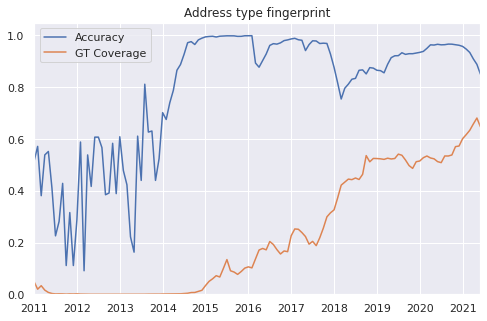

In [148]:
save_plot(df_addresstype_resampled.plot(title="Address type fingerprint", **plot_args), "fp_addresstype_accuracy")

In [149]:
ADDRESS_FP2 = [utils.Fingerprint.MULTISIG, utils.Fingerprint.P2PKH, utils.Fingerprint.P2SH, utils.Fingerprint.P2WPKH, utils.Fingerprint.P2WSH, utils.Fingerprint.ADDRESS_OTHER]
addresstype2_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(ADDRESS_FP2))
addresstype2_filled = get_change_outputs(addresstype2_heuristic)

In [150]:
assess_accuracy(addresstype2_filled, true_change)

0.923339 & 0.293794 &
Heuristic identified a unique change output in 31.82% of transactions.
Heuristic was correct for 92.33% of identified change outputs.


{'correct': 10358435, 'incorrect': 860015, 'unindentified': 24038978}

In [151]:
df_addresstype2_change = df_accuracy_over_time(addresstype2_filled, true_change, true_ts)

In [152]:
df_addresstype2_resampled = get_resampled(df_addresstype2_change)

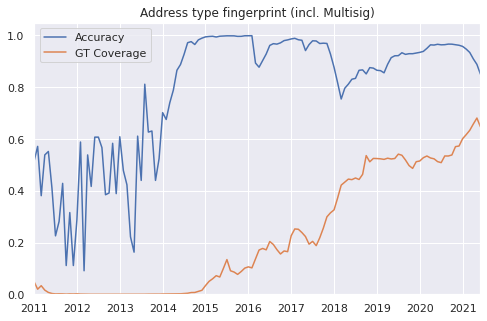

In [153]:
save_plot(df_addresstype2_resampled.plot(title="Address type fingerprint (incl. Multisig)", **plot_args), "fp_addresstype_full_accuracy")

#### P2PKH

In [154]:
p2pkh_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2PKH))
p2pkh_filled = get_change_outputs(p2pkh_heuristic)

In [155]:
assess_accuracy(p2pkh_filled, true_change)

0.946506 & 0.239226 &
Heuristic identified a unique change output in 25.27% of transactions.
Heuristic was correct for 94.65% of identified change outputs.


{'correct': 8434477, 'incorrect': 476696, 'unindentified': 26346255}

In [156]:
df_p2pkh_change = df_accuracy_over_time(p2pkh_filled, true_change, true_ts)

In [157]:
df_p2pkh_resampled = get_resampled(df_p2pkh_change)

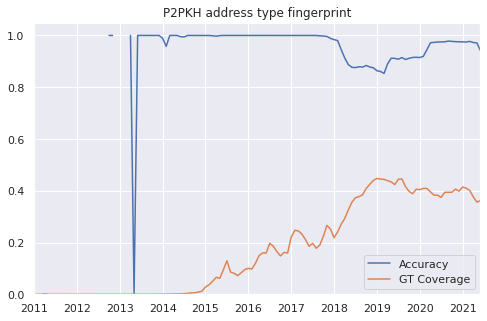

In [158]:
save_plot(df_p2pkh_resampled.plot(title="P2PKH address type fingerprint", **plot_args), "fp_p2pkh_accuracy")

#### P2SH

In [159]:
p2sh_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2SH))
p2sh_filled = get_change_outputs(p2sh_heuristic)

In [160]:
assess_accuracy(p2sh_filled, true_change)

0.946294 & 0.268646 &
Heuristic identified a unique change output in 28.39% of transactions.
Heuristic was correct for 94.63% of identified change outputs.


{'correct': 9471751, 'incorrect': 537564, 'unindentified': 25248113}

In [161]:
df_p2sh_change = df_accuracy_over_time(p2sh_filled, true_change, true_ts)

In [162]:
df_p2sh_resampled = get_resampled(df_p2sh_change)

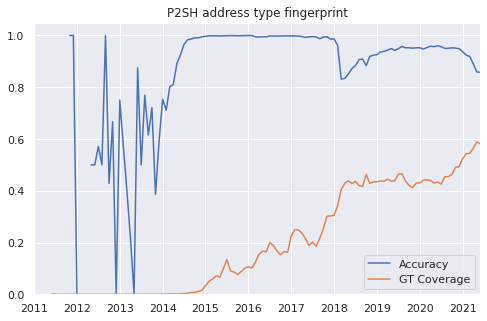

In [163]:
save_plot(df_p2sh_resampled.plot(title="P2SH address type fingerprint", **plot_args), "fp_p2sh_accuracy")

#### P2WPKH

In [164]:
p2wpkh_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2WPKH))
p2wpkh_filled = get_change_outputs(p2wpkh_heuristic)

In [165]:
assess_accuracy(p2wpkh_filled, true_change)

0.895612 & 0.180937 &
Heuristic identified a unique change output in 20.2% of transactions.
Heuristic was correct for 89.56% of identified change outputs.


{'correct': 6379383, 'incorrect': 743547, 'unindentified': 28134498}

In [166]:
df_p2wpkh_change = df_accuracy_over_time(p2wpkh_filled, true_change, true_ts)

In [167]:
df_p2wpkh_resampled = get_resampled(df_p2wpkh_change)

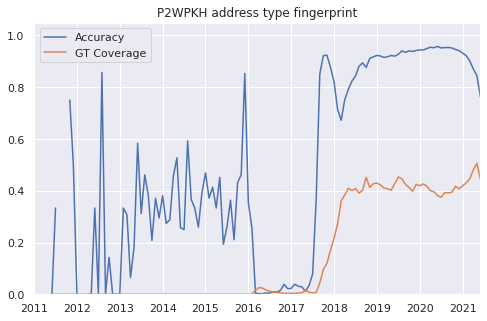

In [168]:
save_plot(df_p2wpkh_resampled.plot(title="P2WPKH address type fingerprint", **plot_args), "fp_p2wpkh_accuracy")

#### P2WSH

In [169]:
p2wsh_heuristic = blocksci.heuristics.change.fingerprint(fp, utils.get_fp_mask(utils.Fingerprint.P2WSH))
p2wsh_filled = get_change_outputs(p2wsh_heuristic)

In [170]:
assess_accuracy(p2wsh_filled, true_change)

0.897564 & 0.063151 &
Heuristic identified a unique change output in 7.04% of transactions.
Heuristic was correct for 89.76% of identified change outputs.


{'correct': 2226545, 'incorrect': 254108, 'unindentified': 32776775}

In [171]:
df_p2wsh_change = df_accuracy_over_time(p2wsh_filled, true_change, true_ts)

In [172]:
df_p2wsh_resampled = get_resampled(df_p2wsh_change)

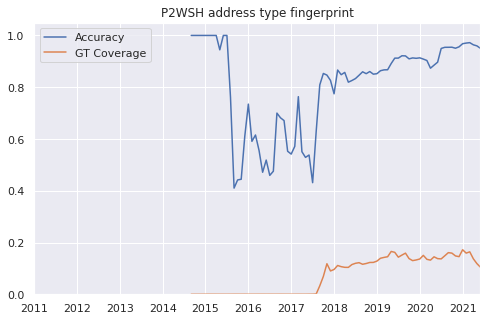

In [173]:
save_plot(df_p2wsh_resampled.plot(title="P2WSH address type fingerprint", **plot_args), "fp_p2wsh_accuracy")

### Absolute fee

In [174]:
absolute_fee_heuristic = blocksci.heuristics.change.fixed_fee
absolute_fee_filled = get_change_outputs(absolute_fee_heuristic)

In [175]:
assess_accuracy(absolute_fee_filled, true_change)

0.822616 & 0.117414 &
Heuristic identified a unique change output in 14.27% of transactions.
Heuristic was correct for 82.26% of identified change outputs.


{'correct': 4139730, 'incorrect': 892667, 'unindentified': 30225031}

In [176]:
df_absolute_fee_change = df_accuracy_over_time(absolute_fee_filled, true_change, true_ts)

In [177]:
df_absolute_fee_resampled = get_resampled(df_absolute_fee_change)

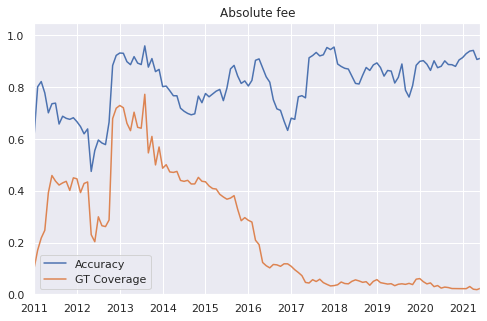

In [178]:
save_plot(df_absolute_fee_resampled.plot(title="Absolute fee", **plot_args), "absolute_fee_accuracy")

### Relative fee

In [179]:
relative_fee_heuristic = blocksci.heuristics.change.fixed_fee_per_byte
relative_fee_filled = get_change_outputs(relative_fee_heuristic)

In [180]:
assess_accuracy(relative_fee_filled, true_change)

0.837913 & 0.041868 &
Heuristic identified a unique change output in 5.0% of transactions.
Heuristic was correct for 83.79% of identified change outputs.


{'correct': 1476164, 'incorrect': 285552, 'unindentified': 33495712}

In [181]:
df_relative_fee_change = df_accuracy_over_time(relative_fee_filled, true_change, true_ts)

In [182]:
df_relative_fee_resampled = get_resampled(df_relative_fee_change)

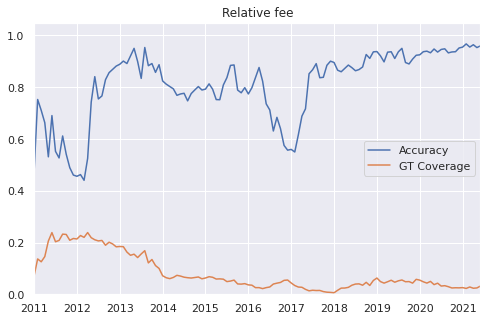

In [183]:
save_plot(df_relative_fee_resampled.plot(title="Relative fee", **plot_args), "relative_fee_accuracy")

### Two-Hops

In [184]:
two_hops_heuristic = blocksci.heuristics.change.two_hops(my_cm)
two_hops_filled = get_change_outputs(two_hops_heuristic)

In [185]:
assess_accuracy(two_hops_filled, true_change)

0.952762 & 0.48771 &
Heuristic identified a unique change output in 51.19% of transactions.
Heuristic was correct for 95.28% of identified change outputs.


{'correct': 17195392, 'incorrect': 852546, 'unindentified': 17209490}

In [186]:
df_two_hops_change = df_accuracy_over_time(two_hops_filled, true_change, true_ts)

In [187]:
df_two_hops_resampled = get_resampled(df_two_hops_change)

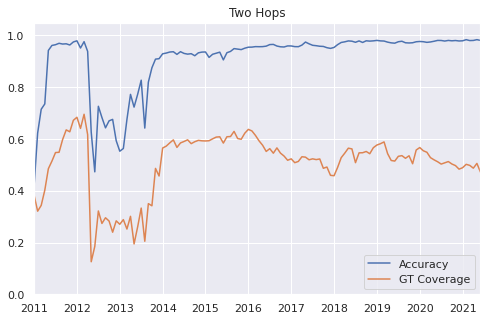

In [188]:
save_plot(df_two_hops_resampled.plot(title="Two Hops", **plot_args), "two_hops_accuracy")

### How much of the ground truth is covered by the heuristics?

In [189]:
def covered_by_any_heuristic(lst):
    covered = []
    total = len(lst[0])
    for i in range(total):
        covered.append(int(any([x[i] != -1 for x in lst])))
    return covered

In [190]:
def correct_by_any_heuristic(lst, true_change):
    covered = []
    total = len(lst[0])
    for i in range(total):
        covered.append(int(any([x[i] == true_change[i] for x in lst])))
    return covered

In [191]:
all_predictions = [
    optimal_change_filled,
    optimal_change_with_fee_filled,
    addresstype_change_filled,
    poweroften_filled_2,
    poweroften_filled_3,
    poweroften_filled_4,
    poweroften_filled_5,
    poweroften_filled_6,
    poweroften_filled_7,
    combined_pow10,
    outputcount_filled,
    version_filled,
    locktime_filled,
    rbf_filled,
    segwit_filled,
    possible_segwit_filled,
    ordered_inouts_filled,
    zeroconf_filled,
    multisig_filled,
    p2pkh_filled,
    p2sh_filled,
    p2wpkh_filled,
    p2wsh_filled,
    addresstype2_filled,
    absolute_fee_filled,
    relative_fee_filled,
    #two_hops_filled
]

In [192]:
data_covered_by_any = covered_by_any_heuristic(all_predictions)

In [193]:
data_correct_by_any = correct_by_any_heuristic(all_predictions, true_change)

In [194]:
df_coverage = pd.DataFrame({"Covered": data_covered_by_any, "At least one correct": data_correct_by_any}, index = true_ts)

<AxesSubplot:ylabel='Share of transactions'>

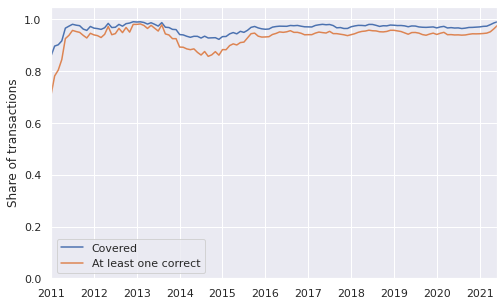

In [195]:
df_coverage.resample("1 M").sum().divide(monthly_tx_count, axis=0).plot(ylabel="Share of transactions", **plot_args)

In [196]:
sum(data_covered_by_any)

34228693

In [197]:
sum(data_correct_by_any)

33263039

In [198]:
sum(data_correct_by_any)/sum(data_covered_by_any)

0.9717881719877531

In [199]:
predictions = pd.DataFrame({
    "true_change": true_change,
    "optimal_change": optimal_change_filled,
    "optimal_change_with_fee": optimal_change_with_fee_filled,
    "address_type": addresstype_change_filled,
    "power_of_ten_2": poweroften_filled_2,
    "power_of_ten_3": poweroften_filled_3,
    "power_of_ten_4": poweroften_filled_4,
    "power_of_ten_5": poweroften_filled_5,
    "power_of_ten_6": poweroften_filled_6,
    "power_of_ten_7": poweroften_filled_7,
    "pow10": combined_pow10,
    "fp_inout_count": inoutcount_filled,
    "fp_output_count": outputcount_filled,
    "fp_version": version_filled,
    "fp_locktime": locktime_filled,
    "fp_rbf": rbf_filled,
    "fp_segwit": segwit_filled,
    "fp_possible_segwit": possible_segwit_filled,
    "fp_ordered_inouts": ordered_inouts_filled,
    "fp_zeroconf": zeroconf_filled,
    "fp_multisig": multisig_filled,
    "fp_p2pkh": p2pkh_filled,
    "fp_p2sh": p2sh_filled,
    "fp_p2wpkh": p2wpkh_filled,
    "fp_p2wsh": p2wsh_filled,
    "fp_address_type": addresstype2_filled,
    "fp_absolute_fee": absolute_fee_filled,
    "fp_relative_fee": relative_fee_filled,
    "two_hops": two_hops_filled
}, index=txindexes)

In [200]:
predictions.to_csv("/home/ubuntu/Data/heuristics/20210709_heuristics_prediction.csv")

In [201]:
len(predictions)

35257428